# A shared-reflector isomorphic Yagi

This antenna is as simple as an isomorphic, linked Yagi gets. There's only one reflector -- it's a single piece of wire, not a linked reflector.

Here, we place focus on the 20m and 40m bands.

In [1]:
from isomorphic_yagis import differential_evolution, evaluate_antenna
from isomorphic_yagis.utils import BAND_WEIGHTS, BANDS, PARAMETER_LIMITS, plot_population, plot_results

In [3]:
# For a single reflector, we have to override the size of all reflectors to be the same
# Here, we're setting them all to whatever the 20m reflector is, arbitrarily
override_values = {f"reflector_length_{band}": "reflector_length_20" for band in BANDS}

# To allow the reflector a full range in parameter space, we have to override its limits
# Overriding is the last thing that happens when clipping an antenna to its limits, so
# we only have to override the size of the reflector we are setting all others to
parameter_limits = PARAMETER_LIMITS | {"reflector_length_20": (0.01, 0.99), "anchor_offset": (5, 20)}

# We want to really see something great on 20m and 40m, so we'll give it a higher weight
band_weights = BAND_WEIGHTS | {"20": 2, "40": 2}

In [37]:
# We'll run a differential evolution experiment with 500 antennas, 
# for 300 generations, with these parameter limits and override values
results = differential_evolution(
    n_population=500, 
    n_generations=300, 
    band_weights=band_weights,
    limits=parameter_limits, 
    override_values=override_values,
    include_unlinked_reflectors=False,
    variance_threshold=1e-5
)

100%|██████████| 300/300 [2:12:14<00:00, 26.45s/it]  


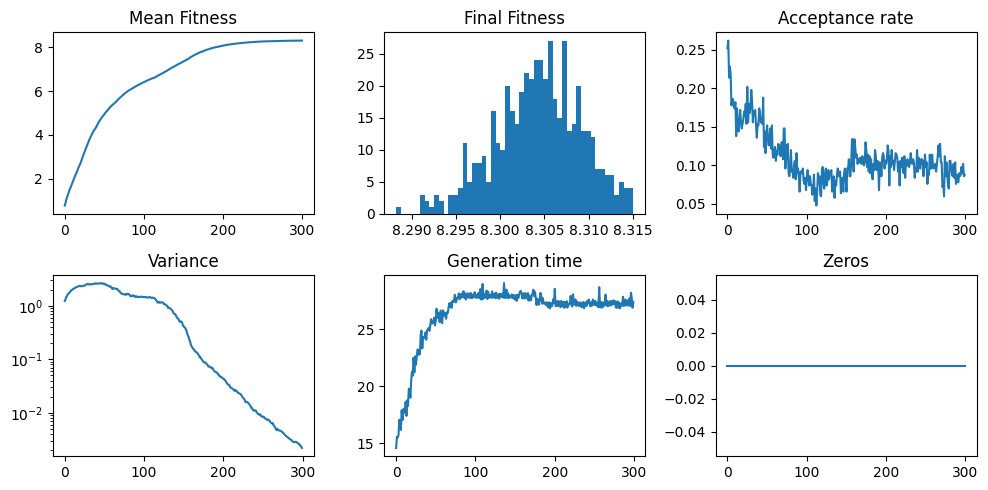

In [42]:
# How'd our experiment go ?
antennas, best_antenna = plot_results(results)

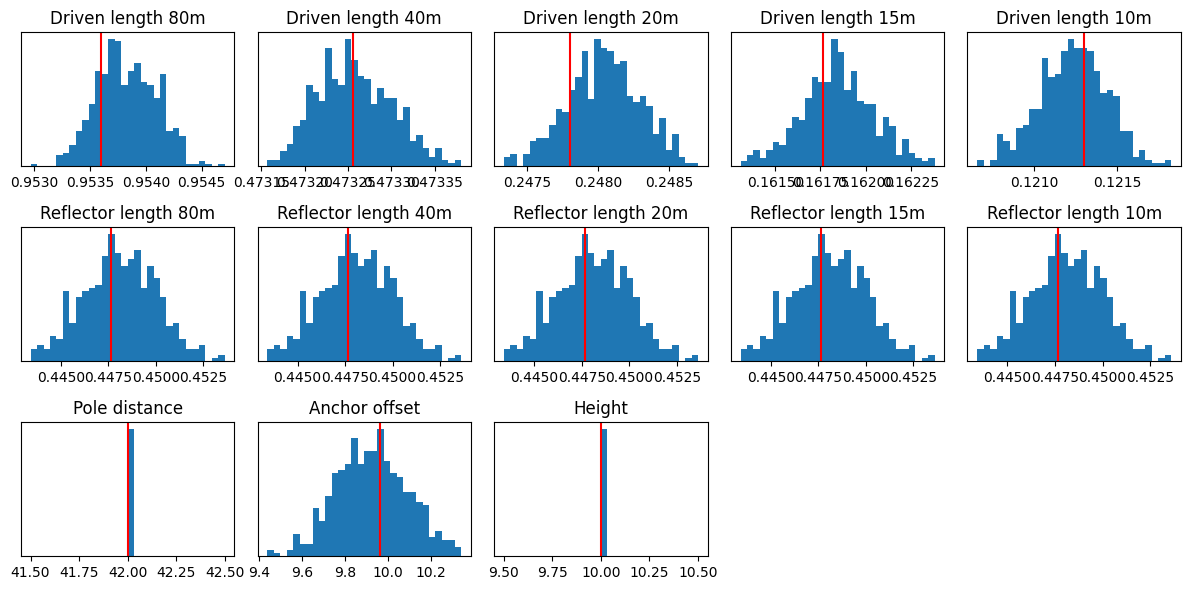

In [43]:
# What does the final antenna population look like ?
plot_population(antennas, results["fitness"])

In [44]:
# Which is our best antenna ?
best_antenna

{'driven_length_80': 0.9535952464839081,
 'reflector_length_80': 0.44765651042020743,
 'driven_length_40': 0.4732559622425824,
 'reflector_length_40': 0.44765651042020743,
 'driven_length_20': 0.24780248474759164,
 'reflector_length_20': 0.44765651042020743,
 'driven_length_15': 0.16176589260828478,
 'reflector_length_15': 0.44765651042020743,
 'driven_length_10': 0.12129814249448802,
 'reflector_length_10': 0.44765651042020743,
 'anchor_offset': 9.96413842319765,
 'pole_distance': 42.0,
 'height': 10.0}

In [4]:
# How does it perform on various bands ?
for band, stats in evaluate_antenna(
    best_antenna, 
    band_weights=band_weights, 
    include_unlinked_reflectors=False, 
    write=True
).items():
    print(f"{band}: {stats['gain']:.2f} dBi at {stats['swr']:.2f}:1 SWR")

80: 5.91 dBi at 1.02:1 SWR
40: 8.99 dBi at 1.00:1 SWR
20: 6.58 dBi at 1.45:1 SWR
15: 8.29 dBi at 1.39:1 SWR
10: 7.87 dBi at 1.52:1 SWR
